In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange

from cycler import cycler


import re

import random
import pickle,pprint

from scipy.stats import gamma
from scipy.optimize import minimize

from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.integrate import odeint
%matplotlib inline

In [2]:


rc('text', usetex=True)

# this is just to have figure with large fontsize
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


plt.rc('font', weight='bold')
plt.rc('xtick.major', size=5, pad=7)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)




## Poisson Process with absolute refractory period

In [3]:
def RHO(tau,nu,d):
    if tau< d:
        return 0 
    else:
        return nu

def S(tau,nu,d):
    if tau <d:
        return 1
    else:
        return np.exp(-nu*(tau-d))
    
def P(tau,nu,d):
    if tau <d:
        return 0
    else:
        return nu*np.exp(-nu*(tau-d))
    
    
    

In [4]:
def phih(h,nu_max,beta,h_0):
    return nu_max*np.exp(beta*(h-h_0))


In [5]:
def Cnm(n,m,h,nu_max,beta,h_0,d):
    
    nu=phih(h,nu_max,beta,h_0)
    
    ln=eigenvalue(n,nu,d)
    lm=eigenvalue(m,nu,d)
    
    if n==m:
        return beta*ln*d*(1+0.5*ln*(ln+nu))/(nu*(1+(ln+nu)*d))
    else:
        return beta*(ln*(nu+lm))/((ln-lm)*(ln+nu)*(1+d*(lm+nu)))
    

def eigenvalue(n,nu,d):
    return (1/d)*sc.special.lambertw(d*nu*np.exp(nu*d), k=n)-nu

In [6]:
def phi1_0h(h,nu_max,beta,h_0,d):
    nu=phih(h,nu_max,beta,h_0)
    l1=eigenvalue(1,nu,d)
    return (nu+l1)/(1+d*(nu+l1))

# Lambert 

In [7]:
#PARAMETERS


beta=1 #mV^{-1}
nu_max=0.05 #kHz
d=5 #ms

h_vec=np.linspace(-100,17,1000)

nu_vec_15=[phih(h,nu_max,beta,15) for h in h_vec]
eig1_vec_15=[eigenvalue(1,nu,d) for nu in nu_vec_15]
eig1re_15=[eig1.real for eig1 in eig1_vec_15]
eig1im_15=[eig1.imag for eig1 in eig1_vec_15]

nu_vec_0=[phih(h,nu_max,beta,10) for h in h_vec]
eig1_vec_0=[eigenvalue(1,nu,d) for nu in nu_vec_0]
eig1re_0=[eig1.real for eig1 in eig1_vec_0]
eig1im_0=[eig1.imag for eig1 in eig1_vec_0]






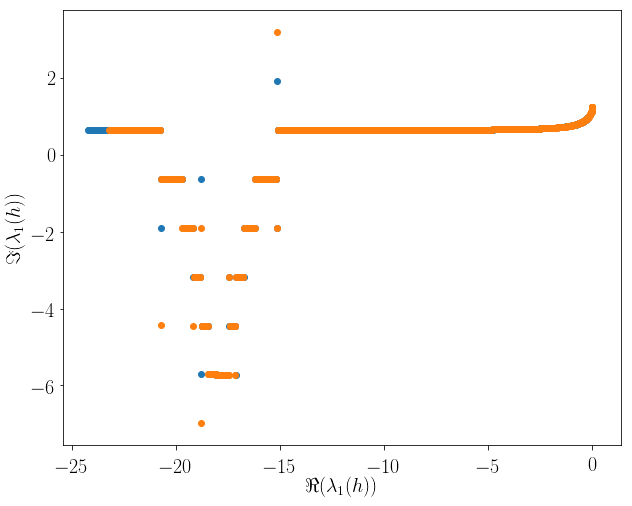

In [8]:

plt.figure(figsize=(10,8))
plt.ylabel(r'$\Im(\lambda_1(h))$')
plt.xlabel(r'$\Re(\lambda_1(h))$')       
plt.scatter(eig1re_15, eig1im_15)
plt.scatter(eig1re_0, eig1im_0)
#plt.xlim(-1,0)


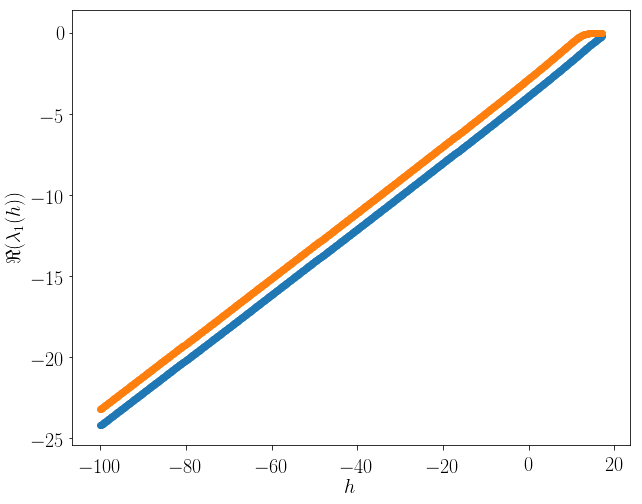

In [76]:
plt.figure(figsize=(10,8))
plt.xlabel(r'$h$')
plt.ylabel(r'$\Re(\lambda_1(h))$')    
plt.scatter(h_vec, eig1re_15)
plt.scatter(h_vec, eig1re_0)


In [9]:
#BRANCHES 

In [10]:
def W(x,n):
    return sc.special.lambertw(x, k=n)

In [29]:
x_vec=np.linspace(0,500,1000)
W_vec0=np.copy([W(x,0) for x in x_vec])
W_vec1=np.copy([W(x,1) for x in x_vec])
W_vec_1=np.copy([W(x,-1) for x in x_vec])

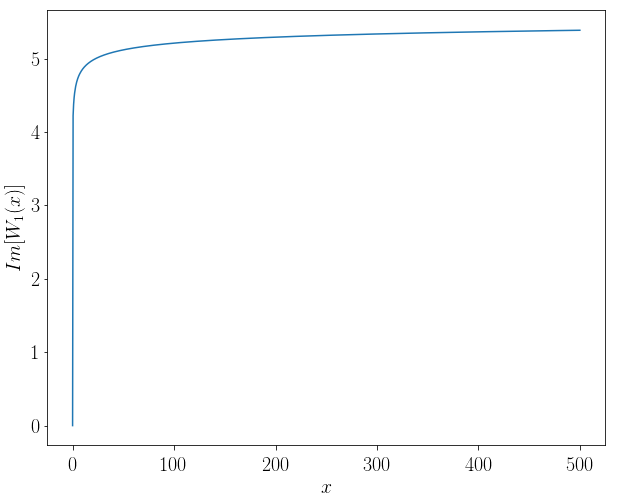

In [30]:
plt.figure(figsize=(10,8))
plt.xlabel(r'$x$')
plt.ylabel(r'$Im[W_1(x)]$')       
plt.plot(x_vec,W_vec1.imag)


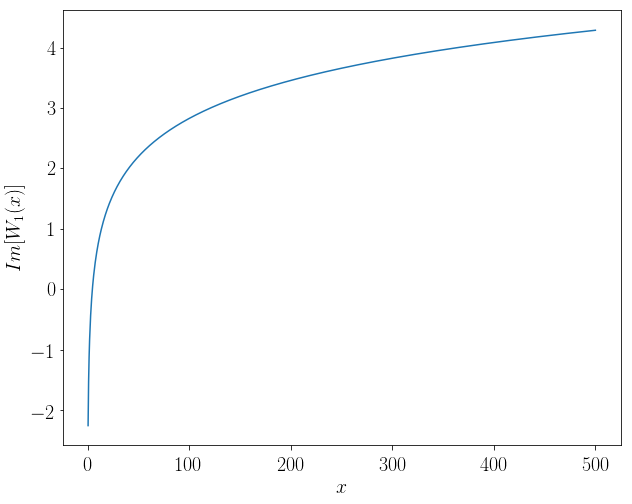

In [31]:
plt.figure(figsize=(10,8))
plt.xlabel(r'$x$')
plt.ylabel(r'$Im[W_1(x)]$')       
plt.plot(x_vec,W_vec1.real)

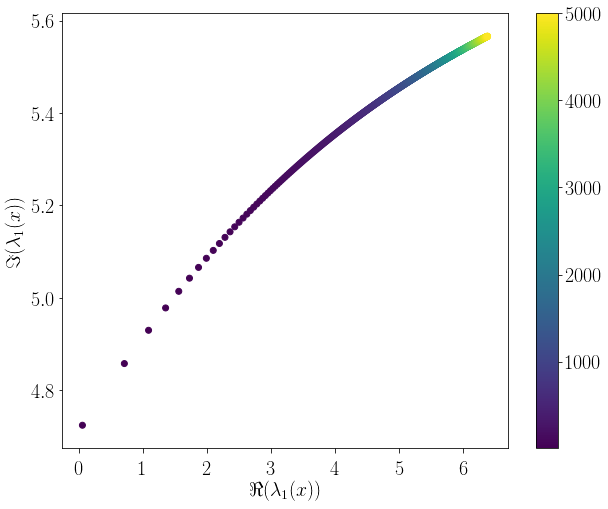

In [12]:
plt.figure(figsize=(10,8))
plt.ylabel(r'$\Im(\lambda_1(x))$')
plt.xlabel(r'$\Re(\lambda_1(x))$')       
plt.scatter(W_vec1.real,W_vec1.imag,c=x_vec)
plt.colorbar()